In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
title_font = {'family':'arial','color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family':'arial','color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
titanic_survival=pd.read_csv('C:/Users/Hp/Downloads/train_titanic.csv')

In [3]:
titanic_survival.drop("Cabin",axis=1,inplace=True)

In [4]:
titanic_survival.dropna(inplace=True)

In [5]:
titanic_survival.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
titanic_survival['Age'] = titanic_survival['Age'].astype("int")

In [7]:
labelencoder=LabelEncoder()
titanic_survival['Sex']=labelencoder.fit_transform(titanic_survival['Sex'])
titanic_survival['Embarked']=labelencoder.fit_transform(titanic_survival['Embarked'])

In [10]:
X=titanic_survival[["Pclass","Sex","Age","SibSp","Parch","Fare"]]
y=titanic_survival["Survived"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state=111)
survival_prediction_model = LogisticRegression()
survival_prediction_model.fit(X_train, y_train)

train_prediction = survival_prediction_model.predict(X_train)
test_prediction = survival_prediction_model.predict(X_test)

test_prediction_probability = survival_prediction_model.predict_proba(X_test)[:,1]

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

In [13]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[299  47]
 [ 68 155]]


Confusion Matrix (Test Data)
------------------------------
[[72  6]
 [20 45]]


In [14]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 72
True positive amount  : 45
False positive amount : 6
False negative amount : 20


In [15]:
from sklearn.metrics import accuracy_score

print("Accuracy value by the model   : ",  survival_prediction_model.score(X_test, y_test))
print("Calculated accuracy value     : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))

Accuracy value by the model   :  0.8181818181818182
Calculated accuracy value     :  0.8181818181818182
accuracy_score() value        :  0.8181818181818182


In [16]:
from sklearn.metrics import precision_score

print("Calculated precision value   : ",  (TP)/(FP + TP))
print("precision_score() value      : ",  precision_score(y_test, test_prediction))

Calculated precision value   :  0.8823529411764706
precision_score() value      :  0.8823529411764706


In [17]:
from sklearn.metrics import recall_score

print("Calculated recall value   : ",  (TP)/(TP + FN))
print("recall_score() value      : ",  recall_score(y_test, test_prediction))

Calculated recall value   :  0.6923076923076923
recall_score() value      :  0.6923076923076923


In [18]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.9230769230769231


In [19]:
from sklearn.metrics import f1_score

precision = precision_score(y_test, test_prediction)
recall = recall_score(y_test, test_prediction)


print("Calculated F1 score  : ",  2*((recall*precision)/(recall + precision)))
print("f1_score() value     : ",  f1_score(y_test, test_prediction))

Calculated F1 score  :  0.7758620689655172
f1_score() value     :  0.7758620689655172


In [20]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        78
           1       0.88      0.69      0.78        65

    accuracy                           0.82       143
   macro avg       0.83      0.81      0.81       143
weighted avg       0.83      0.82      0.81       143

f1_score() value        : 0.78
recall_score() value    : 0.69
precision_score() value : 0.88


Precision  : [0.7826087  0.88235294]
Recall     : [0.92307692 0.69230769]
F1 Score   : [0.84705882 0.77586207]


In [25]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train, y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train, y_train),
                                              'Test Accuracy': lr.score(X_test, y_test)
                                             }, ignore_index=True)
display(accuracy_values)    

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.687170,0.629371
1,0.010,0.752197,0.762238
2,0.100,0.803163,0.811189
3,1.000,0.792619,0.818182
4,10.000,0.792619,0.818182
5,100.000,0.792619,0.818182
6,1000.000,0.792619,0.818182


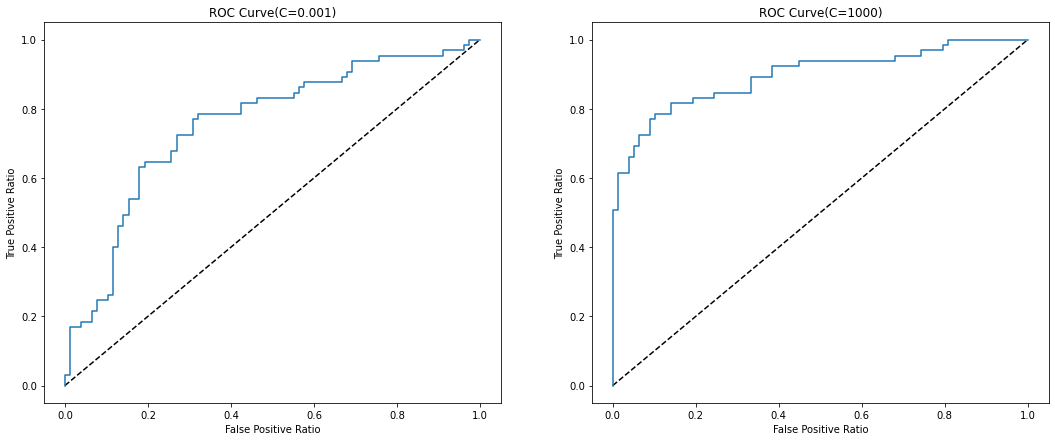

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
lr = LogisticRegression(penalty = 'l2', C = 0.001, random_state = 0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_test, y_test)
test_prediction_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve(C=0.001)')

plt.subplot(1,2,2)
lr = LogisticRegression(penalty = 'l2', C = 1000, random_state = 0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_test, y_test)
test_prediction_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve(C=1000)')

plt.show()

In [64]:
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

AUC value :  0.8958579881656805


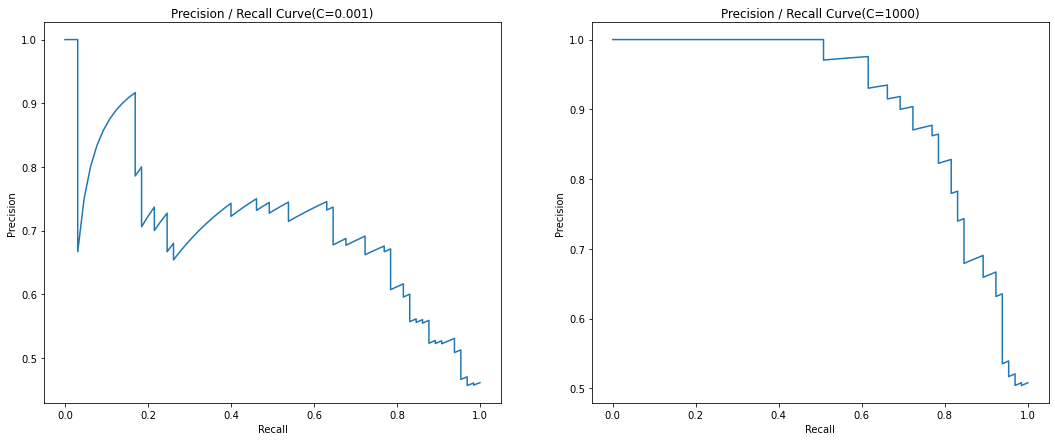

In [67]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
lr = LogisticRegression(penalty = 'l2', C = 0.001, random_state = 0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_test, y_test)
test_prediction_proba = lr.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve(C=0.001)')

plt.subplot(1,2,2)
lr = LogisticRegression(penalty = 'l2', C = 1000, random_state = 0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_test, y_test)
test_prediction_proba = lr.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve(C=1000)')


plt.show()